In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

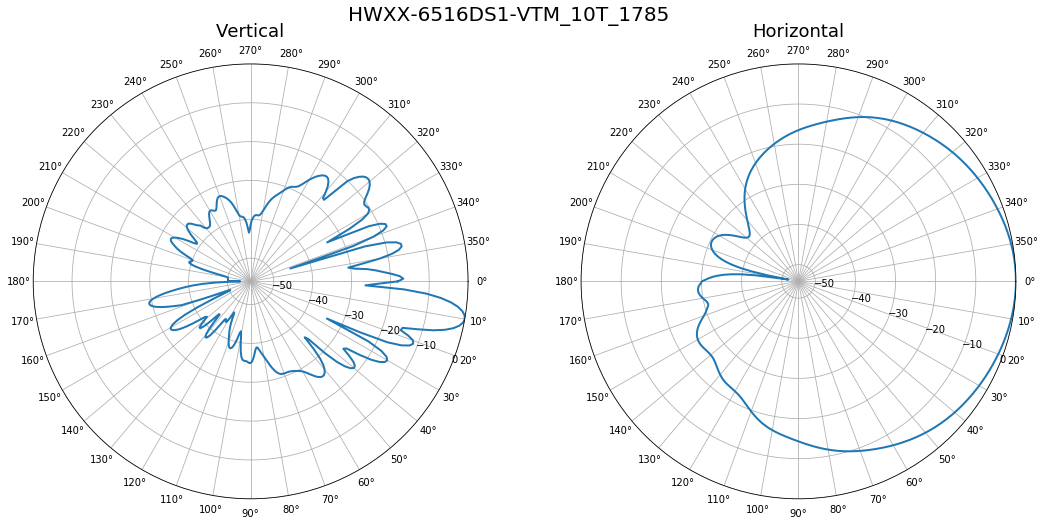

In [33]:
# Import antenna pattern file
antenna = 'HWXX-6516DS1-VTM_10T_1785'
df = pd.read_csv(f'{antenna}.txt', sep='\t', header=None, names=['Angle','Value'])

# Subset vertical and horizontal patterns, and split angles and values.
vert_angle = np.radians(np.array(df.iloc[370:730]['Angle'].astype(float)))
vert_value = np.array(df.iloc[370:730]['Value'].astype(float)) * -1
horiz_angle = np.radians(np.array(df.iloc[9:369]['Angle'].astype(float)))
horiz_value = np.array(df.iloc[9:369]['Value'].astype(float)) * -1

# Repeat first value at end
vert_angle = np.append(vert_angle, np.pi*2)
vert_value = np.append(vert_value, vert_value[0])
horiz_angle = np.append(horiz_angle, np.pi*2)
horiz_value = np.append(horiz_value, horiz_value[0])

# Plot patterns
fig = plt.figure(figsize=(18,8))
fig.suptitle(antenna, fontsize=20)
ax1 = plt.subplot(121, projection='polar')  #121: 1 line, 2 columns, subplot 1
ax2 = plt.subplot(122, projection='polar')
ax1.plot(vert_angle, vert_value, linewidth=2)
ax2.plot(horiz_angle, horiz_value, linewidth=2)
ax1.set_title('Vertical', fontsize=18)
ax2.set_title('Horizontal', fontsize=18)
ax1.set_theta_direction(-1) #clockwise
ax2.set_theta_direction(-1)
ax1.set_xticks(np.radians(np.arange(0,360,10)))
ax2.set_xticks(np.radians(np.arange(0,360,10)))
plt.show()